In [93]:
"""
Load a cropped and straightened image

"""

import numpy as np

cropped_image = np.load("cropped_image.npy")

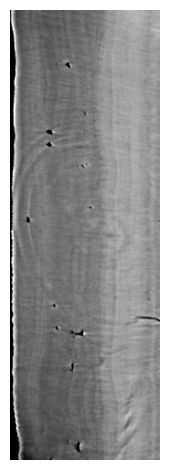

In [94]:
import matplotlib.pyplot as plt

fig, axis = plt.subplots(1, 1)

axis.imshow(cropped_image, cmap="gray")
axis.axis("off")
fig.tight_layout()

In [141]:
"""
Perform filter + ridge detection (no anisotropic diffusion)

"""

from skimage.filters import gaussian

from cementum import filter, segment

filter_img = lambda img: gaussian(
    filter.apply_weighted_filters(img, [1.2]), sigma=1.2
)
find_ridges = lambda img: segment.filter(img, ridge_threshold=0.1)

filtered = filter_img(cropped_image)

ridges = find_ridges(filtered)

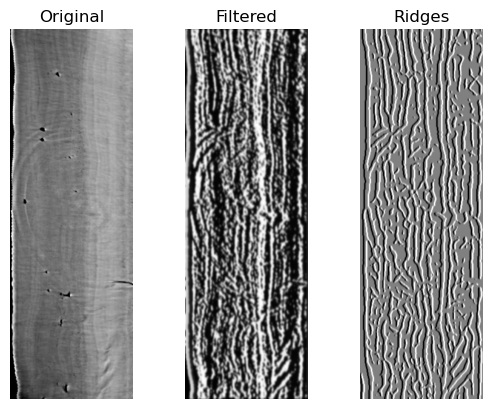

In [142]:
fig, axes = plt.subplots(1, 3)

axes[0].imshow(cropped_image, cmap="gray")
axes[1].imshow(filtered, cmap="gray")
axes[2].imshow(ridges, cmap="gray")

for axis, label in zip(axes, ["Original", "Filtered", "Ridges"]):
    axis.axis("off")
    axis.set_title(label)

In [143]:
"""
Perform filter, ridge detection and denoising

"""

from skimage.morphology import dilation, disk


diffuse = lambda img: dilation(img, disk(2.5))
diffused_ridges = diffuse(ridges)

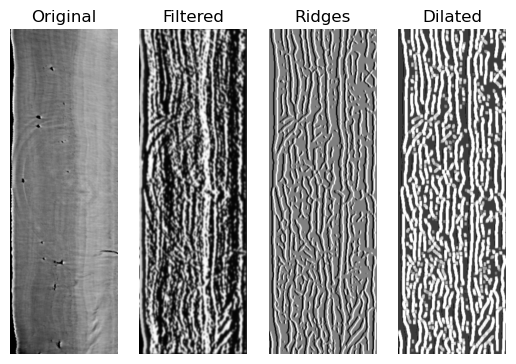

In [145]:
fig, axes = plt.subplots(1, 4)

axes[0].imshow(cropped_image, cmap="gray")
axes[1].imshow(filtered, cmap="gray")
axes[2].imshow(ridges, cmap="gray")
axes[3].imshow(diffused_ridges, cmap="gray")

for axis, label in zip(axes, ["Original", "Filtered", "Ridges", "Dilated"]):
    axis.axis("off")
    axis.set_title(label)

In [150]:
"""
Perform filter, denoising and ridge detection

"""

diffuse = lambda img: dilation(img, disk(1.0))

denoised = diffuse(filtered)
ridges_denoised = find_ridges(denoised)

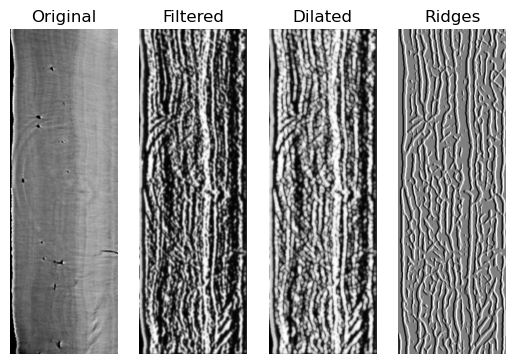

In [151]:
fig, axes = plt.subplots(1, 4)

axes[0].imshow(cropped_image, cmap="gray")
axes[1].imshow(filtered, cmap="gray")
axes[2].imshow(denoised, cmap="gray")
axes[3].imshow(ridges_denoised, cmap="gray")

for axis, label in zip(axes, ["Original", "Filtered", "Dilated", "Ridges"]):
    axis.axis("off")
    axis.set_title(label)